In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Treinando um modelo XGBoost

Modelo baseado em árvores e muito utilizado para datasets tabulares. De construção mais balanceada, tende a ter bom desempenho em datasets pequenos e com uma decision boundary mais uniforme.
Em contrapartida, pode sofrer de overfitting caso a árvore seja muito profunda ou com datasets com muitas features. 

Neste caso, o número baixo de features e o tamanho do dataset são bons indicadores de sucesso para este modelo.

## Carregando dataset

In [27]:
# Carregar o dataset como um dataframe pandas
df = pd.read_csv('data/SouthGermanCredit.asc', sep=' ')

# Print o tamanho do dataframe para comprovar que o arquivo foi carregado corretamente
df.shape

(1000, 21)

In [28]:
# Exibir uma pequena amostra do dataset
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


## Pré-processamento

Como as variáveis categoricas já estão em formato numérico, não farei nenhuma transformação nelas.

In [29]:
# Separar as variáveis categóricas e contínuas
cat_var = ['laufkont', 'moral', 'verw', 'sparkont', 'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit']
cont_var = [col for col in df.columns if col not in cat_var]

In [6]:
# Normalizar features numéricas
scaler = StandardScaler()
df[cont_var] = scaler.fit_transform(df[cont_var])
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,-0.240857,4,2,-0.787657,1,2,4,2,1,...,2,-1.281573,3,1,1,3,2,1,2,1
1,1,-0.987573,4,0,-0.167384,1,3,2,3,1,...,1,0.040363,3,1,2,3,1,1,2,1
2,2,-0.738668,2,9,-0.861381,2,4,2,2,1,...,1,-1.105315,3,1,1,2,2,1,2,1
3,1,-0.738668,4,0,-0.407341,1,3,3,3,1,...,1,0.304750,3,1,2,2,1,1,1,1
4,1,-0.738668,4,0,-0.389974,1,3,4,3,1,...,2,0.216621,1,2,2,2,2,1,1,1


In [7]:
# Definir features e target
X = df.drop('kredit', axis=1)
y = df['kredit']

print(X.shape, y.shape)


(1000, 20) (1000,)


In [8]:
# Dividir dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Treinamento do modelo

In [9]:
#Declarar modelo
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [10]:
# Treinar modelo
xgb_model.fit(X_train, y_train)

/home/rafael/miniconda3/envs/ds/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [10:15:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

## Avaliação do modelo treinado

In [11]:
# Extrair predições com base no modelo treinado
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

In [36]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc_roc:.2f}")

#F1 Score
print(f"F1: {f1_score(y_test, y_pred):.2}")

Accuracy: 0.73
AUC-ROC: 0.74
F1: 0.81


### Matriz de confusão

Exemplos do dataset de test
Com risco: 62
Sem risco: 138


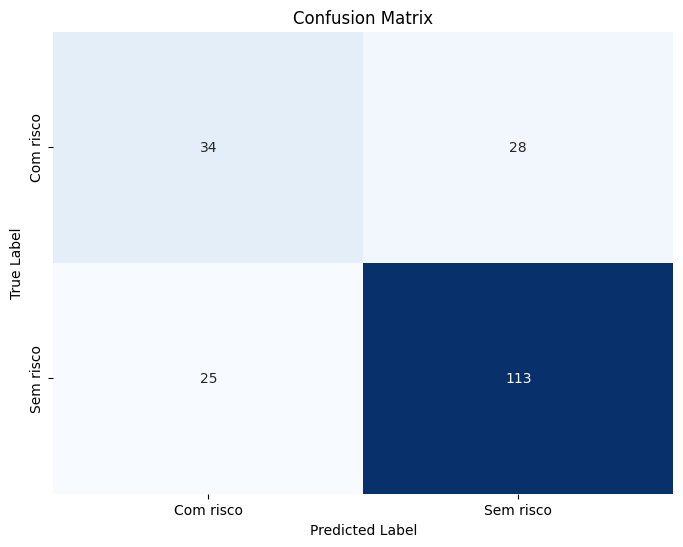

In [26]:
cm = confusion_matrix(y_test, y_pred)

print('Exemplos do dataset de test')
print('Com risco:', (y_test == 0).sum())
print('Sem risco:', (y_test == 1).sum())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Com risco', 'Sem risco'],
            yticklabels=['Com risco', 'Sem risco'])

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

### Visualização das features mais importantes

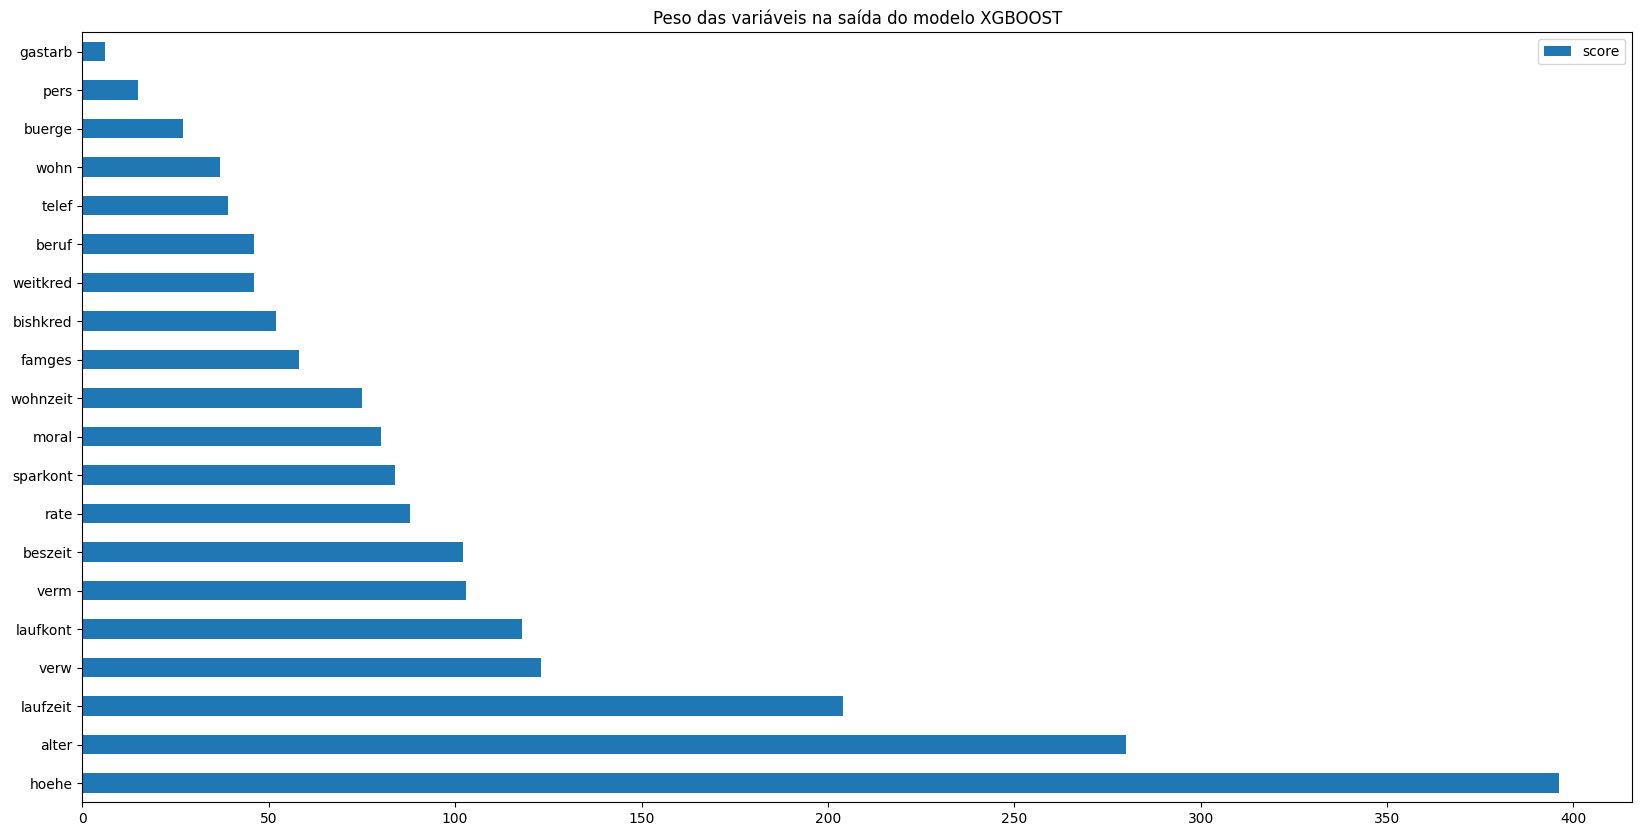

In [19]:
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) 

plt.title('Peso das variáveis na saída do modelo XGBOOST')

plt.show()